## CIFAR 10

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.conv_learner import *
from pathlib import Path

if os.name == 'nt':
    PATH = str(Path.home()) + "\\data\\cifar10\\"
else:
    PATH = "data/cifar10/"
os.makedirs(PATH, exist_ok=True)

In [3]:
def moveFilesToSubDirsFromFileName(path):
    files = os.listdir(path)
    for f in files:
        if os.path.isdir(os.path.join(path, f)):
            continue
        filename, file_extension = os.path.splitext(f)
        regex = re.compile('[^a-zA-Z]')        
        file_label = regex.sub('', filename)
        target_folder = os.path.join(path, file_label)
        if not os.path.exists(target_folder): os.makedirs(target_folder)
        os.rename(os.path.join(path, f), os.path.join(target_folder, f))
    
moveFilesToSubDirsFromFileName(os.path.join(PATH, "train"))
moveFilesToSubDirsFromFileName(os.path.join(PATH, "test"))

In [4]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
stats = (np.array([ 0.4914 ,  0.48216,  0.44653]), np.array([ 0.24703,  0.24349,  0.26159]))

In [5]:
def get_data(sz,bs):
    tfms = tfms_from_stats(stats, sz, aug_tfms=[RandomFlipXY()], pad=sz//8)
    return ImageClassifierData.from_paths(PATH, val_name='test', tfms=tfms, bs=bs)

In [6]:
bs=128

### Look at data

In [7]:
data = get_data(32,4)

In [8]:
x,y=next(iter(data.trn_dl))

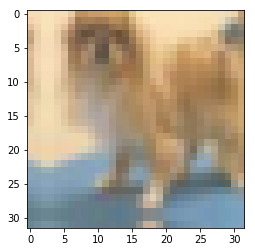

In [9]:
plt.imshow(data.trn_ds.denorm(x)[0]);

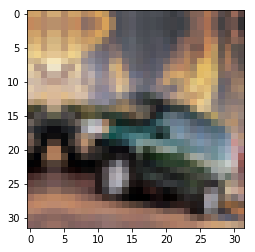

In [10]:
plt.imshow(data.trn_ds.denorm(x)[1]);

## Initial model

In [11]:
from fastai.models.cifar10.resnext import resnext29_8_64

m = resnext29_8_64()
bm = BasicModel(m.cuda(), name='cifar10_rn29_8_64')

In [12]:
data = get_data(8,bs*4)

In [13]:
learn = ConvLearner(data, bm)
learn.unfreeze()

In [14]:
lr=1e-2; wd=5e-4

In [15]:
%time learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[        0.              3.5633   18175140.              0.12178]                                                      

Wall time: 46.7 s


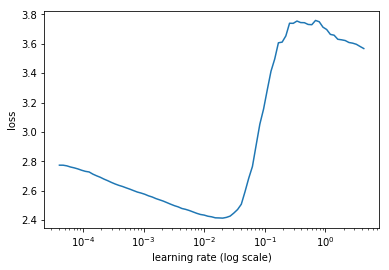

In [16]:
learn.sched.plot()

In [17]:
%time learn.fit(lr, 1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       1.83035  1.6621   0.426  ]                                                                                  

Wall time: 46.2 s


In [18]:
%time learn.fit(lr, 2, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

[ 0.       1.51445  1.44001  0.47905]                                                                                  
[ 1.       1.42473  1.37292  0.51204]                                                                                  

Wall time: 1min 33s


In [19]:
%time learn.fit(lr, 3, cycle_len=1, cycle_mult=2, wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       1.35642  1.34017  0.52541]                                                                                  
[ 1.       1.34906  1.31096  0.53565]                                                                                  
[ 2.       1.22198  1.26867  0.54813]                                                                                  
[ 3.       1.27478  1.29772  0.53558]                                                                                  
[ 4.       1.18974  1.24326  0.56088]                                                                                  
[ 5.       1.07987  1.19085  0.57724]                                                                                  
[ 6.       0.98998  1.18321  0.58659]                                                                                  

Wall time: 5min 29s


In [20]:
learn.save('8x8_8')

## 16x16

In [21]:
learn.load('8x8_8')

In [22]:
learn.set_data(get_data(16,bs*2))

In [23]:
%time learn.fit(1e-3, 1, wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       1.47773  1.44393  0.48418]                                                                                  

Wall time: 28.8 s


In [24]:
learn.unfreeze()

In [25]:
%time learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[  0.        2.37109  38.67047   0.06523]                                                                              

Wall time: 1min 21s


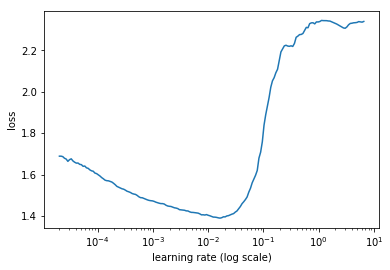

In [26]:
learn.sched.plot()

In [27]:
lr=1e-2

In [28]:
%time learn.fit(lr, 2, cycle_len=1, wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

[ 0.       1.23718  1.13733  0.58047]                                                                                  
[ 1.       1.06456  0.97876  0.65234]                                                                                  

Wall time: 2min 44s


In [29]:
%time learn.fit(lr, 3, cycle_len=1, cycle_mult=2, wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.97881  0.91924  0.67217]                                                                                  
[ 1.       0.96392  0.88653  0.68975]                                                                                  
[ 2.       0.78107  0.78977  0.72471]                                                                                  
[ 3.       0.86713  0.85789  0.69824]                                                                                  
[ 4.       0.73994  0.75984  0.73564]                                                                                  
[ 5.       0.61451  0.67219  0.76582]                                                                                  
[ 6.       0.54415  0.65561  0.77666]                                                                                  

Wall time: 9min 33s


In [30]:
learn.save('16x16_8')

## 24x24

In [31]:
learn.load('16x16_8')

In [32]:
learn.set_data(get_data(24,bs))

In [33]:
%time learn.fit(1e-2, 1, wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       0.70303  0.74772  0.7498 ]                                                                                  

Wall time: 1min


In [34]:
learn.unfreeze()

In [35]:
%time learn.fit(lr, 1, cycle_len=1, wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       0.59369  0.57039  0.80617]                                                                                  

Wall time: 2min 56s


In [36]:
%time learn.fit(lr, 3, cycle_len=1, cycle_mult=2, wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.53523  0.52861  0.82199]                                                                                  
[ 1.       0.56829  0.58339  0.79945]                                                                                  
[ 2.       0.39284  0.44606  0.85008]                                                                                  
[ 3.       0.53491  0.53506  0.81596]                                                                                  
[ 4.       0.41874  0.46131  0.84355]                                                                                  
[ 5.       0.29617  0.39648  0.86867]                                                                                  
[ 6.       0.23673  0.37395  0.87688]                                                                                  

Wall time: 20min 38s


In [37]:
learn.save('24x24_8')

In [38]:
%time log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),0)
metrics.log_loss(y,preds), accuracy(preds,y)

Wall time: 48.8 s                                                                                                      


(0.34536337916754428, 0.88429999999999997)

## 32x32

In [39]:
learn.load('24x24_8')

In [40]:
learn.set_data(get_data(32,bs))

In [41]:
%time learn.fit(1e-2, 1, wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       0.29115  0.38678  0.86748]                                                                                  

Wall time: 1min 41s


In [42]:
learn.unfreeze()

In [43]:
%time learn.fit(lr, 3, cycle_len=1, cycle_mult=2, wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.29423  0.32727  0.89142]                                                                                  
[ 1.       0.33989  0.36907  0.8753 ]                                                                                  
[ 2.       0.20025  0.29145  0.90467]                                                                                  
[ 3.       0.35191  0.39717  0.86837]                                                                                  
[ 4.       0.24731  0.34318  0.88637]                                                                                  
[ 5.       0.15654  0.27886  0.90694]                                                                                  
[ 6.       0.11937  0.26213  0.91297]                                                                                  

Wall time: 32min


In [44]:
%time learn.fit(lr, 3, cycle_len=4, wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=12), HTML(value='')))

[ 0.       0.27319  0.44538  0.85384]                                                                                  
[ 1.       0.19994  0.32833  0.89013]                                                                                  
[ 2.       0.10997  0.27452  0.90951]                                                                                  
[ 3.       0.08045  0.25281  0.91703]                                                                                  
[ 4.       0.23139  0.54708  0.83851]                                                                                  
[ 5.       0.14289  0.34389  0.89458]                                                                                  
[ 6.       0.08392  0.25454  0.92029]                                                                                  
[ 7.       0.05825  0.24489  0.92217]                                                                                  
[ 8.       0.20754  0.48011  0.85552]   

In [45]:
%time log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),0)
metrics.log_loss(y,preds), accuracy(preds,y)

Wall time: 1min 22s                                                                                                    


(0.21534575302689613, 0.9284)

In [46]:
learn.save('32x32_8')